# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [140]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/keziaelice/Dataset/refs/heads/main/penguins_size.csv')
df.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
98,Adelie,Dream,33.1,16.1,178.0,2900.0,FEMALE
59,Adelie,Biscoe,37.6,19.1,194.0,3750.0,MALE
97,Adelie,Dream,40.3,18.5,196.0,4350.0,MALE
32,Adelie,Dream,39.5,17.8,188.0,3300.0,FEMALE
289,Gentoo,Biscoe,50.7,15.0,223.0,5550.0,MALE
122,Adelie,Torgersen,40.2,17.0,176.0,3450.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE
206,Chinstrap,Dream,42.5,17.3,187.0,3350.0,FEMALE
226,Gentoo,Biscoe,45.4,14.6,211.0,4800.0,FEMALE
38,Adelie,Dream,37.6,19.3,181.0,3300.0,FEMALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [141]:
#2
df.info()

# Dataset ini memiliki 344 entri data dengan 7 kolom yang terdiri atas:
# 1. species (type object)
# 2. island (type object)
# 3. culmen_length_mm (type float64, memuat 2 missing values dari total 344 data)
# 4. culmen_depth_mm (type float64, memuat 2 missing values dari total 344 data)
# 5. flipper_length_mm (type float64, memuat 2 missing values dari total 344 data)
# 6. body_mass_g (type float64, memuat 2 missing values dari total 344 data)
# 7. sex (type object, memuat 10 missing values karena hanya ada 334 data non-null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [142]:
#3
df.describe()

# 1. culmen_length_mm (Panjang Culmen dalam mm):
# - count: Ada 342 entri data
# - mean: Panjang culmen rata-rata adalah 43.92 mm
# - std: Variasi atau seberapa jauh data menyebar dari rata-rata adalah 5.46
# - min: Panjang culmen terpendek adalah 32.1 mm
# - 25% (kuartil pertama): 25% dari data memiliki panjang culmen ≤ 39.23 mm
# - 50% (median): Setengah dari data memiliki panjang culmen ≤ 44.45 mm
# - 75% (kuartil ketiga): 75% dari data memiliki panjang culmen ≤ 48.5 mm
# - max: Panjang culmen terpanjang adalah 59.6 mm
# 2. culmen_depth_mm (Kedalaman Culmen dalam mm):
# - count: Ada 342 entri data
# - mean: Kedalaman culmen rata-rata adalah 17.15 mm
# - std: Standar deviasinya adalah 1.97, menunjukkan variasi yang kecil
# - min: Kedalaman culmen terkecil adalah 13.1 mm
# - 25% (kuartil pertama): 25% dari data memiliki kedalaman culmen ≤ 15.6 mm
# - 50% (median): Setengah dari data memiliki kedalaman culmen 17.3 mm
# - 75% (kuartil ketiga): 75% dari data memiliki kedalaman culmen ≤ 18.7 mm
# - max: Kedalaman culmen terbesar adalah 21.5 mm
# 3. flipper_length_mm (Panjang Flipper dalam mm):
# - count: Ada 342 entri data
# - mean: Panjang flipper rata-rata adalah 200.92 mm
# - std: Variasi panjang flipper adalah 14.06
# - min: Panjang flipper terpendek adalah 172 mm
# - 25% (kuartil pertama): 25% dari data memiliki panjang flipper ≤ 190 mm
# - 50% (median): Setengah dari data memiliki panjang flipper 197 mm
# - 75% (kuartil ketiga): 75% dari data memiliki panjang flipper ≤ 213 mm
# - max: Panjang flipper terpanjang adalah 231 mm
# 4. body_mass_g (Berat Badan dalam gram):
# - count: Ada 342 entri data
# - mean: Berat badan rata-rata adalah 4201.75 gram (sekitar 4.2 kg)
# - std: Variasi berat badan adalah 801.95
# - min: Berat badan terendah adalah 2700 gram
# - 25% (kuartil pertama): 25% dari data memiliki berat badan ≤ 3550 gram
# - 50% (median): Setengah dari data memiliki berat badan 4050 gram
# - 75%: 75% dari data memiliki berat badan ≤ 4750 gram
# - max: Berat badan terbesar adalah 6300 gram

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [143]:
#4
species_count = df['species'].value_counts(dropna=False)
print(species_count)
island_count = df['island'].value_counts(dropna=False)
print(island_count)
sex_count = df['sex'].value_counts(dropna=False)
print(sex_count)

# 1. species: Terdapat 152 individu dari spesies Adelie (mayoritas), 124 individu dari spesies Gentoo, dan 68 individu dari spesies Chinstrap.
# 2. island: Mengelompokkan individu berdasarkan pulau asalnya, dimana terdapat 168 individu yang berasal dari Pulau Biscoe, 124 individu dari Pulau Dream, dan 52 individu dari Pulau Torgersen.
# 3. sex: Terdapat 168 individu laki-laki dan 165 individu perempuan yang menandakan keseimbangan antara kedua jenis kelamin. Namun, ada 10 individu dengan jenis kelamin yang tidak diketahui (missing data) dan ada 1 entri (.) yang mungkin merupakan error atau entri yang tidak jelas dalam data.

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
NaN        10
.           1
Name: count, dtype: int64


5. Null handling

In [144]:
#5
df = df.dropna()
df.isnull().sum()

# Semua nilai NaN dihapus dari DataFrame, kemudian jumlah NaN diperiksa untuk memastikan bahwa tidak ada lagi data yang hilang.

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Create your own insightful visualization and explain it in at least 2 sentences

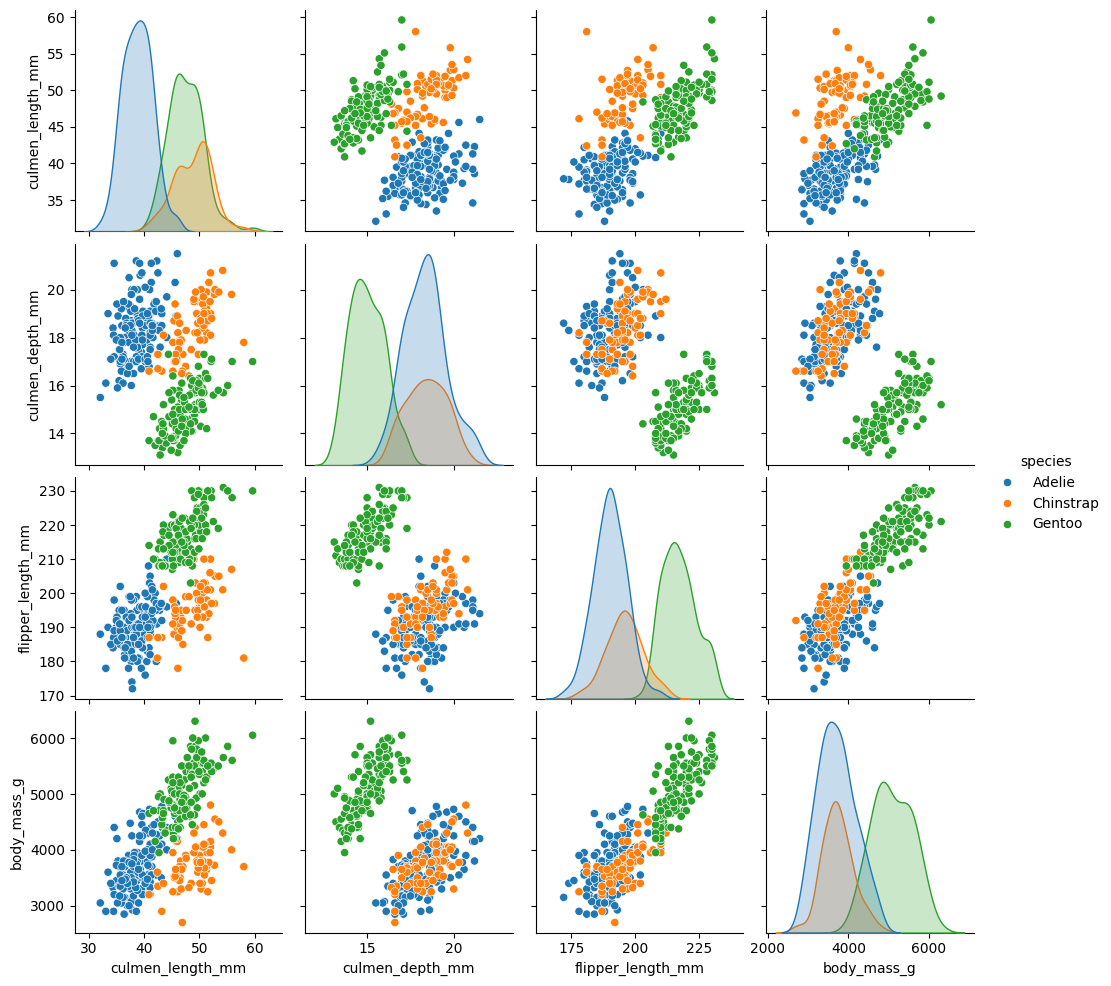

In [145]:
#6 Pair Plot
sns.pairplot(df, hue='species')
plt.show()

# Pairplot ini menunjukkan perbedaan yang signifikan antara ketiga spesies penguin dalam hal ukuran tubuh dan karakteristik fisik lainnya.
# Secara umum, penguin dengan tubuh lebih besar (ditunjukkan oleh body mass) juga memiliki flipper dan culmen yang lebih panjang, dengan spesies Gentoo secara signifikan lebih besar dibandingkan dengan Chinstrap dan Adelie.
# Korelasi antara kedalaman culmen dan variabel lain tidak terlalu kuat, yang menunjukkan bahwa kedalaman culmen mungkin kurang memiliki pengaruh yang besar.

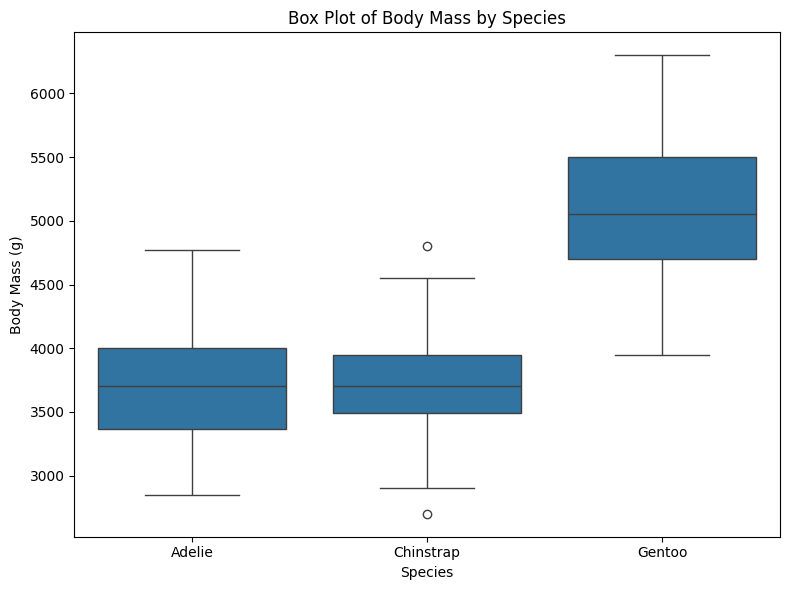

In [146]:
#6 Box Plot of Body Mass by Species
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='species', y='body_mass_g')
plt.title('Box Plot of Body Mass by Species')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.tight_layout()
plt.show()

# Box plot ini menunjukkan distribusi body mass penguin dari tiga spesies: Adelie, Chinstrap, dan Gentoo.
# 1. Adelie: Berat badan penguin Adelie berkisar antara sekitar 3000 hingga 4500 gram, dengan median (garis tengah kotak) sekitar 3700 gram. Rentang interkuartilnya (kotak) menunjukkan variabilitas sedang, dan ada beberapa outlier di bawah 3000 gram.
# 2. Chinstrap: Penguin Chinstrap memiliki distribusi berat yang mirip dengan Adelie, berkisar dari sekitar 3000 hingga 4500 gram, tetapi dengan median sedikit lebih tinggi, mendekati 3700 gram. Terdapat satu outlier di atas 4500 gram, menandakan ada satu penguin yang lebih berat dibandingkan penguin lain dalam kelompok ini.
# 3. Gentoo: Penguin Gentoo memiliki berat badan yang jauh lebih besar dibandingkan dua spesies lainnya, dengan rentang antara 5000 hingga 6000 gram dan median sekitar 5300 gram. Rentang interkuartilnya juga lebih besar, menunjukkan variabilitas yang lebih tinggi.
# Secara keseluruhan, penguin Gentoo cenderung jauh lebih berat daripada spesies Adelie dan Chinstrap, yang beratnya relatif mirip satu sama lain.

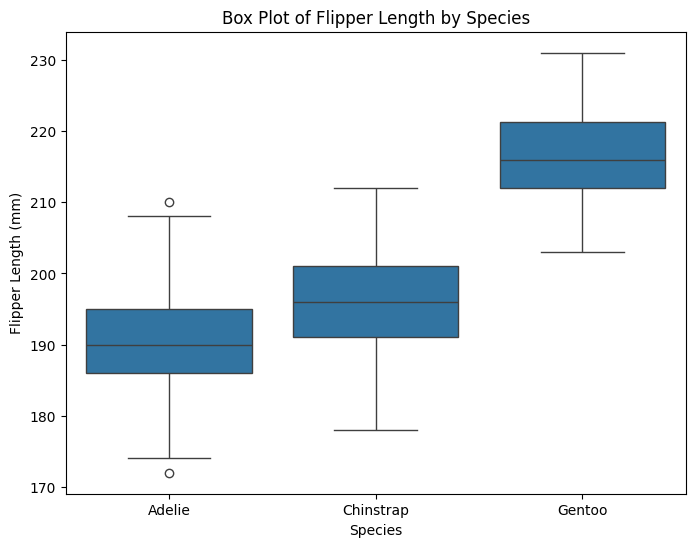

In [147]:
#6 Box Plot of Flipper Length by Species
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='species', y='flipper_length_mm')
plt.title('Box Plot of Flipper Length by Species')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')
plt.show()

# Box plot ini menunjukkan distribusi panjang flipper penguin dari tiga spesies: Adelie, Chinstrap, dan Gentoo.
# 1. Adelie: Panjang flipper penguin Adelie berkisar antara 170 mm hingga 210 mm, dengan median (garis tengah kotak) sekitar 195 mm. Ada beberapa outlier di bawah 180 mm, yang menunjukkan keberadaan penguin dengan panjang flipper yang lebih pendek.
# 2. Chinstrap: Penguin Chinstrap memiliki panjang flipper yang relatif seragam, berkisar antara 180 mm hingga 210 mm, dengan median sekitar 200 mm. Ini menunjukkan bahwa flipper Chinstrap cenderung lebih konsisten dalam ukuran dibandingkan spesies lainnya.
# 3. Gentoo: Panjang flipper penguin Gentoo berada di rentang tertinggi, berkisar dari 210 mm hingga 230 mm, dengan median sekitar 220 mm. Box plot ini menunjukkan bahwa Gentoo memiliki flipper yang lebih panjang dibandingkan Adelie dan Chinstrap.
# Secara keseluruhan, box plot ini mengindikasikan bahwa panjang flipper dapat menjadi indikator penting dalam membedakan spesies penguin, dengan Gentoo menunjukkan ukuran yang lebih besar dibandingkan spesies lainnya.

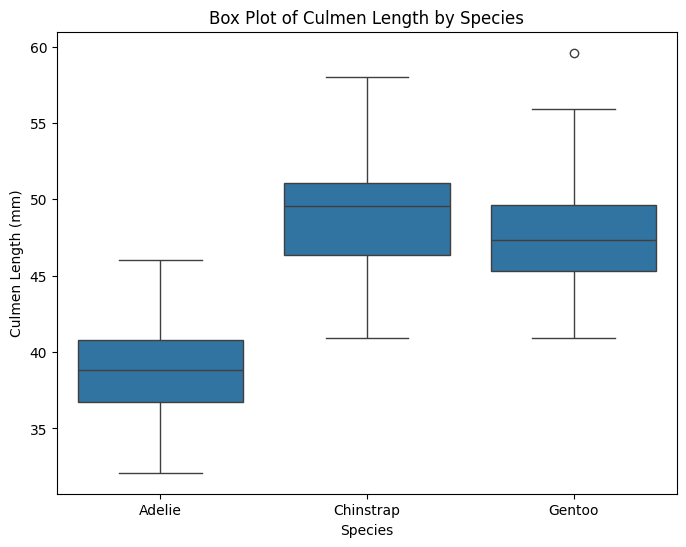

In [148]:
#6 Box Plot of Culmen Length by Species
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='species', y='culmen_length_mm')
plt.title('Box Plot of Culmen Length by Species')
plt.xlabel('Species')
plt.ylabel('Culmen Length (mm)')
plt.show()

# Box plot ini menunjukkan distribusi panjang culmen penguin dari tiga spesies: Adelie, Chinstrap, dan Gentoo.
# 1. Adelie: Panjang culmen untuk penguin Adelie berkisar antara 35 mm hingga 50 mm, dengan median (garis tengah kotak) di sekitar 40 mm. Ini menunjukkan bahwa sebagian besar penguin Adelie memiliki panjang culmen yang relatif konsisten, meskipun ada beberapa outlier yang menunjukkan pengukuran yang lebih rendah.
# 2. Chinstrap: Untuk penguin Chinstrap, panjang culmen berada dalam rentang 40 mm hingga 55 mm, dengan median sekitar 50 mm. Hal ini menunjukkan bahwa Chinstrap cenderung memiliki panjang culmen yang lebih besar dibandingkan Adelie, dan variasi ukuran lebih lebar.
# 3. Gentoo: Panjang culmen penguin Gentoo berkisar dari 45 mm hingga 60 mm, dengan median sekitar 50 mm. Box plot ini menunjukkan bahwa Gentoo juga memiliki panjang culmen yang lebih besar dibandingkan Adelie, dengan sedikit variasi.
# Secara keseluruhan, box plot ini mengindikasikan bahwa panjang culmen dapat menjadi karakteristik yang berguna dalam membedakan spesies penguin. Adelie cenderung memiliki panjang culmen yang lebih pendek dibandingkan Gentoo dan Chinstrap.

7. Check unique value of our target variable

In [149]:
#7
print(df['species'].unique())

# Mencetak nilai unik dalam kolom spesies yang menjadi target variable.

['Adelie' 'Chinstrap' 'Gentoo']


8. encode categorical columns and display the results

In [150]:
#8
df['island'] = df['island'].map({'Biscoe': 0, 'Dream': 1, 'Torgersen': 2})
df['sex'] = df['sex'].map({'MALE': 2, 'FEMALE': 1, '.':0})
df.head()

# Mengubah kategori island dan sex menjadi nilai numerik 0, 1, dan 2

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,2
1,Adelie,2,39.5,17.4,186.0,3800.0,1
2,Adelie,2,40.3,18.0,195.0,3250.0,1
4,Adelie,2,36.7,19.3,193.0,3450.0,1
5,Adelie,2,39.3,20.6,190.0,3650.0,2


9. encode the target column and display the results

In [151]:
#9
df['species'] = df['species'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})
df.head()

# Mengubah kategori spesies menjadi nilai numerik 0, 1, dan 2

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,2


10. create a heatmap to see the correlation and explain the conclusion

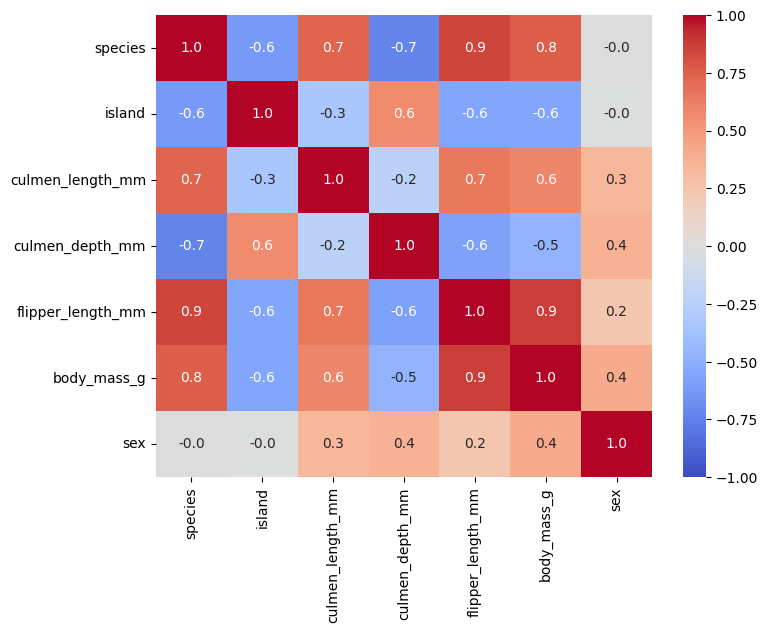

In [152]:
#10
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", vmin=-1, vmax=1)
plt.show()

# Warna biru menunjukkan korelasi negatif, artinya semakin tinggi nilai satu variabel, semakin rendah nilai variabel lainnya.
# Warna merah menunjukkan korelasi positif, artinya semakin tinggi nilai satu variabel, semakin tinggi juga nilai variabel lainnya.
# Warna abu-abu menunjukkan bahwa tidak ada korelasi atau korelasi antar variabel tidak terlalu kuat.
# Dari heatmap ini, dapat disimpulkan:
# - flipper_length_mm dan body_mass_g memiliki korelasi positif yang kuat (0.9). Artinya, penguin dengan panjang sirip yang lebih besar cenderung memiliki massa tubuh yang lebih besar.
# - species memiliki korelasi positif yang kuat dengan culmen_length_mm (0.7), body_mass_g (0.8), dan flipper_length_mm (0.9). Hal ini menunjukkan bahwa jenis kelamin cukup berpengaruh terhadap panjang paruh, berat penguin, dan panjang flipper penguin.
# - culmen_length_mm dan flipper_length_mm memiliki korelasi positif yang cukup kuat (0.7), menandakan bahwa semakin panjang paruh, maka akan semakin panjang juga sirip penguin.
# - culmen_depth_mm memiliki korelasi negatif yang cukup kuat (-0.7) dengan species, menandakan bahwa kedalaman paruh cukup dipengaruhi oleh jenis kelamin penguin.

## Machine Learning

1. Splitting X and y

In [153]:
#1
X = df.drop('species', axis=1)
y = df['species']

# Seluruh variabel kecuali species menjadi variabel independen (fitur yang akan digunakan untuk memprediksi) dan disimpan dalam X
# y menyimpan variabel species sebagai target variabel dependen yang ingin diprediksi

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [154]:
#2
# Membagi data menjadi train data (80%) dan test data (20%) dengan random state 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
#3
# Menampilkan dimensi dari X_train dan X_test
X_train.shape, X_test.shape

((267, 6), (67, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [156]:
#Criterion Entropy
#a
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

# criterion='entropy': Parameter ini menentukan kriteria pemisahan yang akan digunakan untuk membangun decision tree. Dengan menggunakan entropy, algoritma ini akan menghitung entropi untuk memilih fitur terbaik yang dapat memisahkan kelas target dalam data. Ini adalah salah satu cara untuk mengukur "ketidakpastian" atau "ketidakpastian informasi" dari data.
# random_state=42: Parameter ini digunakan untuk memastikan bahwa hasil pemodelan dapat dihasilkan kembali di lain waktu dengan konsisten.

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [157]:
#b
y_pred_entropy = clf_entropy.predict(X_test)

# Variabel y_pred_entropy menyimpan hasil prediksi yang dihasilkan oleh model. Hasil ini akan berupa array atau daftar yang berisi kelas-kelas yang diprediksi untuk setiap baris dalam X_test, yang kemudian dapat digunakan untuk evaluasi model, seperti menghitung akurasi, presisi, dan metrik lainnya untuk menilai kinerja model.

In [158]:
#c
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Model accuracy score with criterion entropy:", accuracy_entropy)

# Variabel accuracy_entropy akan berisi nilai akurasi dari model klasifikasi, yang dapat berkisar antara 0 hingga 1 (atau 0% hingga 100% jika dinyatakan dalam persentase). Nilai yang lebih tinggi menunjukkan bahwa model lebih baik dalam memprediksi label dengan benar, dan ini memberikan informasi penting tentang seberapa baik model tersebut bekerja dalam klasifikasi data pengujian.

Model accuracy score with criterion entropy: 0.9850746268656716


In [159]:
#d
# Menghitung dan mencetak score dari training set
train_score = clf_entropy.score(X_train, y_train)
print(f"Training set score: {train_score:.4f}")

# Menghitung dan mencetak score dari test set
test_score = clf_entropy.score(X_test, y_test)
print(f"Test set score: {test_score:.4f}")

# Metode score digunakan untuk menghitung akurasi model pada data training dan testing.
# Skor akurasi 1.0000 (atau 100%) pada training set menunjukkan bahwa model telah memprediksi semua data pelatihan dengan benar. Ini berarti model tidak melakukan kesalahan dalam mengklasifikasikan semua contoh dalam data training.
# Skor akurasi 0.9851 (atau 98.51%) pada test set menunjukkan bahwa model memprediksi dengan benar sekitar 98.51% dari data pengujian. Ini adalah kinerja yang sangat baik dan menunjukkan bahwa model mampu menggeneralisasi dengan baik pada data yang tidak dilihat sebelumnya.

Training set score: 1.0000
Test set score: 0.9851


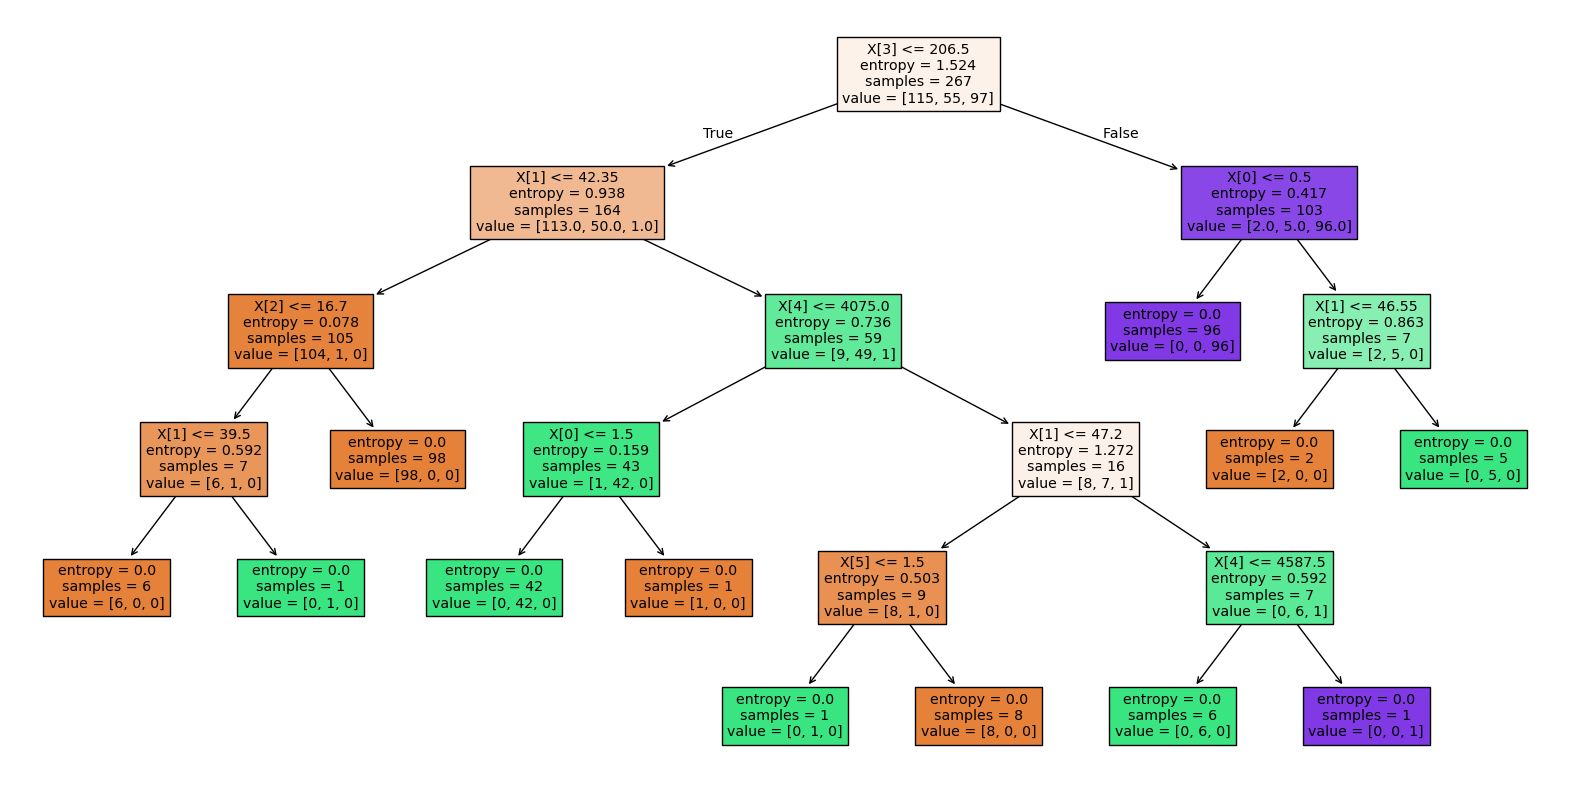

In [160]:
#e
plt.figure(figsize=(20, 10))
tree.plot_tree(clf_entropy, filled=True, feature_names=[f"X[{i}]" for i in range(X.shape[1])])
plt.show()

# Node Akar (X[3] <= 206.5): Ini adalah titik awal pemisahan yang memeriksa apakah fitur X[3] (culmen_length_mm) kurang dari atau sama dengan 206.5. Nilai entropi pada node ini adalah 1.524, yang menunjukkan tingkat ketidakpastian atau keragaman data. Di node ini terdapat 267 sampel, yang terbagi menjadi tiga kelas: 115 sampel dari kelas y[0], 55 sampel dari kelas y[1], dan 97 sampel dari kelas y[2], dengan kelas mayoritas adalah y[0].
# Cabang Kiri (X[1] <= 42.35): Setelah pemisahan berdasarkan X[3] <= 206.5, cabang kiri memeriksa apakah X[1] (island) kurang dari atau sama dengan 42.35. Entropi di node ini lebih rendah, yaitu 0.938, dengan 164 sampel yang tersisa, di mana mayoritasnya berasal dari kelas y[0] (113 sampel di y[0], 50 di y[1], dan 1 di y[2]). Cabang ini kemudian dipecah lebih lanjut berdasarkan X[2] <= 16.7.
# Cabang Kanan (X[3] > 206.5)**: Jika X[3] lebih besar dari 206.5, data akan menuju ke cabang kanan. Entropi di cabang ini lebih rendah, yaitu 0.417, dengan 103 sampel, di mana mayoritasnya berasal dari kelas y[2] (96 sampel di y[2]). Cabang ini kemudian memeriksa lebih lanjut apakah X[0] (fitur pertama) <= 0.5 dan kemudian membagi data berdasarkan X[4] (fitur keempat) dan X[1].
# Node: Setiap cabang akhirnya mencapai node daun, di mana entropi menjadi 0, menunjukkan bahwa tidak ada lagi ketidakpastian dan semua sampel di node tersebut termasuk dalam satu kelas tertentu. Inti dari model ini adalah bahwa Decision Tree membagi data menjadi kelompok yang lebih kecil berdasarkan fitur tertentu, hingga mencapai titik di mana setiap kelompok memiliki klasifikasi yang jelas (entropi 0). Model ini memanfaatkan fitur-fitur seperti X[1], X[2], dan X[3] untuk menentukan cara membagi data dengan tujuan meminimalkan ketidakpastian atau keragaman di setiap cabang.

2. Criterion Gini index

In [161]:
#a
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

# criterion='gini': Indeks Gini adalah metode yang umum digunakan dalam algoritma decision tree untuk memilih fitur mana yang paling baik dalam membagi data.
# random_state=42: Parameter ini digunakan untuk memastikan bahwa hasil pemodelan dapat dihasilkan kembali di lain waktu dengan konsisten.

DecisionTreeClassifier(random_state=42)

In [162]:
#b
y_pred_gini = clf_gini.predict(X_test)

# Variabel y_pred_gini menyimpan hasil prediksi yang dihasilkan oleh model. Hasil ini akan berupa array atau daftar yang berisi kelas-kelas yang diprediksi untuk setiap baris dalam X_test, yang kemudian dapat digunakan untuk evaluasi model, seperti menghitung akurasi, presisi, dan metrik lainnya untuk menilai kinerja model.

In [163]:
#c
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("Model accuracy score with criterion gini index:", accuracy_gini)

# Variabel accuracy_gini akan berisi nilai akurasi dari model klasifikasi, yang dapat berkisar antara 0 hingga 1 (atau 0% hingga 100% jika dinyatakan dalam persentase). Nilai yang lebih tinggi menunjukkan bahwa model lebih baik dalam memprediksi label dengan benar, dan ini memberikan informasi penting tentang seberapa baik model tersebut bekerja dalam klasifikasi data pengujian.

Model accuracy score with criterion gini index: 1.0


In [164]:
#d
# Menghitung dan mencetak score dari training set
train_score = clf_gini.score(X_train, y_train)
print(f"Training set score: {train_score:.4f}")

# Menghitung dan mencetak score dari test set
test_score = clf_gini.score(X_test, y_test)
print(f"Test set score: {test_score:.4f}")

# Metode score digunakan untuk menghitung akurasi model pada data training dan testing.
# Hasil "Training set score: 1.0000" dan "Test set score: 1.0000" menunjukkan bahwa model Decision Tree dengan kriteria Gini memberikan akurasi sempurna baik pada data pelatihan (training set) maupun data pengujian (test set).

Training set score: 1.0000
Test set score: 1.0000


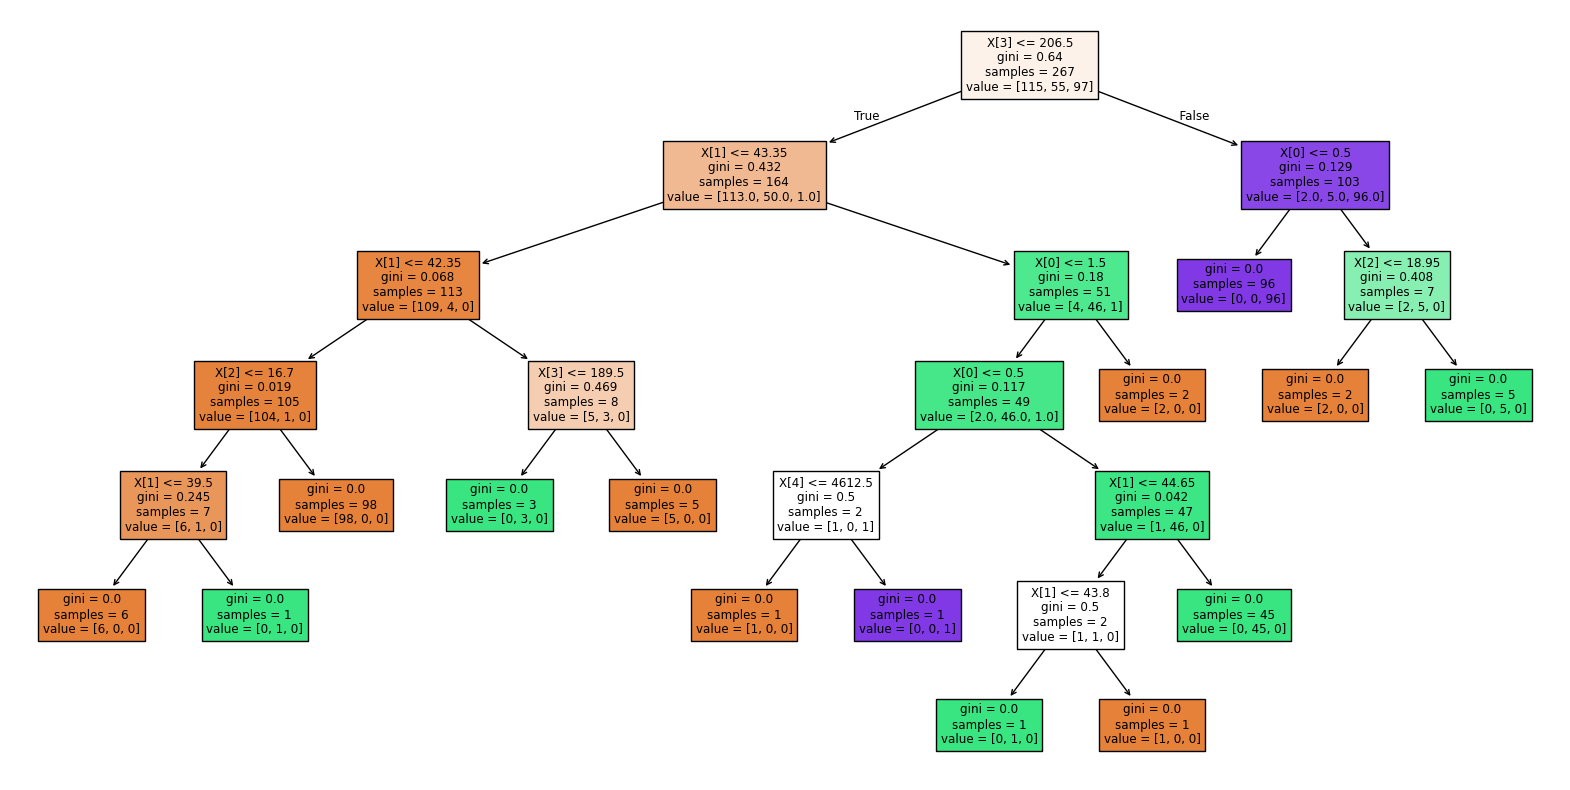

In [165]:
#e
plt.figure(figsize=(20, 10))
tree.plot_tree(clf_gini, filled=True, feature_names=[f"X[{i}]" for i in range(X.shape[1])])
plt.show()

# Node Akar (X[3] <= 206.5): Ini adalah node pertama yang memisahkan data berdasarkan fitur X[3]. Gini impurity di node ini adalah 0.647, menunjukkan tingkat ketidakmurnian data. Ada 267 sampel di node ini, terbagi menjadi tiga kelas: 115 sampel di kelas y[0], 55 di kelas y[1], dan 97 di kelas y[2], dengan mayoritas berada di kelas y[0].
# Cabang Kiri (X[1] <= 42.33): Cabang kiri memeriksa fitur X[1] untuk menentukan apakah nilainya kurang dari atau sama dengan 42.33. Gini impurity di node ini adalah 0.0, artinya node ini murni (pure), dan semua sampel berada di kelas y[0]. Ada 113 sampel di cabang ini, dengan mayoritas di kelas y[0].
# Cabang Kanan (X[3] > 206.5): Jika X[3] lebih dari 206.5, data akan diarahkan ke cabang kanan. Node ini selanjutnya membagi data berdasarkan fitur X[0] <= 0.5. Gini impurity di sini rendah, yaitu 0.129, dan sebagian besar sampel berada di kelas y[2]. Ada 103 sampel di node ini, dengan mayoritas berada di kelas y[2].
# Node Daun: Gini impurity sebesar 0 berarti node tersebut murni, dengan semua sampel di dalamnya termasuk dalam satu kelas yang sama. Nilai di node menunjukkan jumlah sampel yang termasuk dalam setiap kelas. Kelas akhir adalah yang ditetapkan untuk semua sampel di node tersebut. Ketika pohon keputusan mencapai node daun, proses pengklasifikasian selesai, dan node tersebut memberikan hasil akhir untuk klasifikasi sampel di dalamnya.

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [166]:
#f
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
print("Confusion Matrix Entropy")
print(cm_entropy)
cm_gini = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix Gini Index")
print(cm_gini)

# Entropy:
# Baris pertama (kelas 1): Dari 31 sampel yang sebenarnya di kelas 1, model memprediksi 30 dengan benar (di kotak [30, 0]) dan salah satu sampel diprediksi sebagai kelas 2 (di kotak [1, 1]).
# Baris kedua (kelas 2): Semua 13 sampel di kelas 2 diprediksi dengan benar sebagai kelas 2 (di kotak [13, 1]), tidak ada kesalahan.
# Baris ketiga (kelas 3): Semua 23 sampel di kelas 3 diprediksi dengan benar sebagai kelas 3 (di kotak [23, 2]), tanpa kesalahan.

# Gini Index:
# Baris pertama (kelas 1): Semua 31 sampel di kelas 1 diprediksi dengan benar (di kotak [31, 0]), tanpa ada kesalahan.
# Baris kedua (kelas 2): Semua 13 sampel di kelas 2 diprediksi dengan benar sebagai kelas 2 (di kotak [13, 1]).
# Baris ketiga (kelas 3): Semua 23 sampel di kelas 3 diprediksi dengan benar sebagai kelas 3 (di kotak [23, 2]).

# Kesimpulan:
# Model Entropy memiliki akurasi yang sangat tinggi, tetapi ada satu kesalahan di mana satu sampel dari kelas 1 salah diklasifikasikan sebagai kelas 2.
# Model Gini Index menunjukkan kinerja sempurna, dengan semua sampel diklasifikasikan dengan benar tanpa kesalahan.

Confusion Matrix Entropy
[[30  1  0]
 [ 0 13  0]
 [ 0  0 23]]
Confusion Matrix Gini Index
[[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]


In [167]:
#g
cr_entropy = classification_report(y_test, y_pred_entropy)
print("Classification Report Entropy")
print(cr_entropy)
cr_gini = classification_report(y_test, y_pred_gini)
print("Classification Report Gini Index")
print(cr_gini)

# Entropy:
# Kelas 0 (31 sampel): Precision 1.00 berarti model memprediksi semua sampel sebagai kelas 0 dengan benar. Namun, recall 0.97 menunjukkan bahwa dari 31 sampel aktual di kelas 0, hanya 97% yang diprediksi dengan benar, ada satu sampel yang salah prediksi. F1-score adalah 0.98, yang menunjukkan keseimbangan antara precision dan recall.
# Kelas 1 (13 sampel): Precision 0.93 menunjukkan bahwa model kadang salah memprediksi kelas ini sebagai kelas lain. Namun, recall 1.00 berarti bahwa semua sampel aktual di kelas 1 diprediksi dengan benar oleh model. F1-score 0.96 menunjukkan performa yang baik, tetapi tidak sempurna.
# Kelas 2 (23 sampel): Precision, recall, dan F1-score semuanya 1.00, yang menunjukkan bahwa model memprediksi semua sampel di kelas 2 dengan benar, tanpa kesalahan.

# Gini:
# Semua kelas (0, 1, dan 2): Precision, recall, dan F1-score semuanya 1.00 untuk setiap kelas, menunjukkan bahwa model memprediksi dengan sempurna semua sampel di ketiga kelas tanpa ada kesalahan.

# Kesimpulan:
# Model Entropy: Sangat baik, tetapi ada satu kesalahan kecil di kelas 0, yang menyebabkan akurasi sedikit turun menjadi 99%.
# Model Gini Index: Lebih unggul karena menghasilkan prediksi sempurna di seluruh kelas, dengan akurasi 100%.

Classification Report Entropy
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67

Classification Report Gini Index
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [168]:
#h
# Kesimpulan:
# Model entropy melakukan prediksi yang sangat baik, hanya dengan satu kesalahan di kelas 0. Precision, recall, dan f1-score secara keseluruhan sangat tinggi. Satu sampel dari kelas 0 salah diklasifikasikan sebagai kelas 1, tetapi performa pada kelas lainnya sempurna.
# Model gini memberikan hasil yang sempurna. Tidak ada kesalahan dalam memprediksi sampel di semua kelas. Precision, recall, dan f1-score adalah 1.00 untuk setiap kelas, menunjukkan model tidak membuat satu pun kesalahan klasifikasi.

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [169]:
#a
nb = GaussianNB()
nb.fit(X_train, y_train)

# Kode ini menggunakan model Gaussian Naive Bayes untuk mempelajari data training. Setelah pelatihan, model dapat digunakan untuk memprediksi kelas data baru dengan menggunakan asumsi bahwa fitur-fitur input mengikuti distribusi normal.

GaussianNB()

In [170]:
#b
y_pred_nb = nb.predict(X_test)

# Variabel y_pred_nb menyimpan hasil prediksi yang dihasilkan oleh model. Hasil ini akan berupa array atau daftar yang berisi kelas-kelas yang diprediksi untuk setiap baris dalam X_test, yang kemudian dapat digunakan untuk evaluasi model, seperti menghitung akurasi, presisi, dan metrik lainnya untuk menilai kinerja model.

In [174]:
#c
accuracy_nb = accuracy_score(y_test, y_pred_nb)

#d
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

print("Confusion Matrix")
print(conf_matrix_nb)
print("Accuracy Score: " , accuracy_nb)

# Baris pertama (kelas 0): Model memprediksi semua 31 sampel sebagai kelas 0 dengan benar, dan tidak ada kesalahan prediksi (0 kesalahan untuk kelas lain).
# Baris kedua (kelas 1): Model memprediksi semua 13 sampel sebagai kelas 1 dengan benar, tanpa kesalahan.
# Baris ketiga (kelas 2): Model memprediksi semua 23 sampel sebagai kelas 2 dengan benar, tanpa kesalahan.

# Accuracy adalah rasio prediksi yang benar terhadap total jumlah sampel. Dalam kasus ini, accuracy score 1.0 (100%) menunjukkan bahwa model memprediksi setiap sampel dengan benar.
# Ini berarti bahwa tidak ada satu pun kesalahan klasifikasi dalam prediksi model Gaussian Naive Bayes ini.

Confusion Matrix
[[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]
Accuracy Score:  1.0


In [172]:
#e
class_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report")
print(class_report_nb)

# Precision:
# Menunjukkan persentase prediksi yang benar untuk setiap kelas.
# Semua kelas (0, 1, dan 2) memiliki precision 1.00, yang berarti dari semua prediksi untuk kelas tersebut, semuanya benar.
# Recall:
# Menunjukkan persentase sampel yang benar-benar dari kelas tersebut yang terdeteksi oleh model.
# Recall untuk semua kelas juga 1.00, yang berarti model berhasil menemukan semua sampel dari kelas yang sesuai tanpa ada yang terlewatkan.
# F1-Score:
# Kombinasi dari precision dan recall. F1-score tinggi menunjukkan keseimbangan antara keduanya.
# Semua kelas memiliki F1-Score 1.00, yang menunjukkan model bekerja sempurna dalam mengklasifikasikan data pada semua kelas.
# Support:
# Menunjukkan jumlah sampel dalam setiap kelas. Dalam hal ini, ada 31 sampel di kelas 0, 13 di kelas 1, dan 23 di kelas 2.
# Accuracy:
# 1.00 (100%), menunjukkan bahwa model memprediksi semua 67 sampel dengan benar.
# Macro Avg:
# Rata-rata precision, recall, dan f1-score di semua kelas.
# 1.00 untuk precision, recall, dan f1-score, menunjukkan bahwa kinerja model pada semua kelas setara dan sempurna.
# Weighted Avg:
# Rata-rata tertimbang precision, recall, dan f1-score berdasarkan jumlah sampel di setiap kelas.
# 1.00 di semua metrik, yang berarti model mempertahankan performa sempurna meskipun jumlah sampel di setiap kelas tidak merata.

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [173]:
#f
# Akurasi 100%: Model berhasil memprediksi semua sampel dalam dataset uji dengan benar, tanpa satu pun kesalahan klasifikasi.
# Precision, Recall, dan F1-Score 1.00: Setiap kelas (0, 1, dan 2) memiliki nilai precision, recall, dan f1-score sebesar 1.00, yang berarti model ini sempurna dalam mengenali dan memprediksi semua kelas dengan benar, tanpa false positives (kesalahan positif) atau false negatives (kesalahan negatif).
# Confusion Matrix mendukung hasil ini, dengan semua prediksi berada di diagonal, menunjukkan bahwa setiap sampel diprediksi dalam kelas yang benar.

# Kesimpulan:
# Model Gaussian Naive Bayes bekerja dengan sangat efektif pada dataset ini, menghasilkan klasifikasi sempurna di semua metrik evaluasi. Meskipun performa ini sangat ideal, perlu dilakukan analisis lebih lanjut untuk memastikan bahwa tidak ada overfitting dan model tetap generalisasi dengan baik pada data baru di luar dataset uji ini.

Good Luck :)